[참고](https://github.com/rickiepark/handson-ml2/blob/master/09_unsupervised_learning.ipynb)

- 군집(clustering) <br/>
    : 비슷한 샘플을 **클러스터**(cluster)로 모음. 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용됨.
- 이상치 탐지(outlier detection) <br/>
    : '정상' 데이터가 어떻게 보이는지 학습하고 비정상 샘플을 감지하는 데 사용. 결함 제품을 감지하거나 새로운 트렌드를 찾는다.
- 밀도 추정(density estimation) <br/>
    : 데이터셋 생성 확률 과정(random process)의 **확률 밀도 함수**(probability density funtion, PDF)를 추정. <br/>
    밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높으므로 이상치 탐지에 사용되거나 데이터 분석과 시각화에 사용됨.

# 9.1 군집

- **군집**(clustering) : 비슷한 샘플을 구별해 하나의 **클러스터**(cluster) 또는 비슷한 샘플의 그룹으로 할당하는 작업.

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

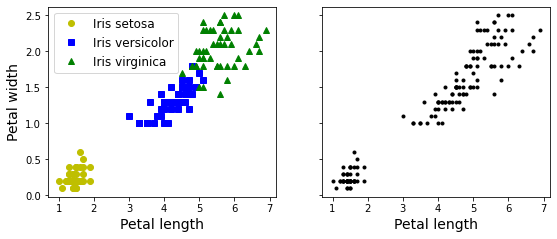

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

분류(classification, 왼쪽)와 군집(clustering, 오른쪽) <br/>
이 자료는 이미 구분이 되어있어서 분류로도 잘 되지만, 안 되어있을 경우 군집을 이용. <br/>
오른쪽 그래프에서 좌측 하단에 따로 있는 cluster는 구분 가능하지만 우측 상단은 잘 구분하기가 어려워 보이는데, <br/>
이 경우 다른 특성들을 이용하면 분류할 수 있다.

군집의 이용
- 고객 분류 <br/>
    : 구매 이력이나 웹사이트 내 행동 등을 기반으로 고객을 클러스터로 모을 수 있음. 클러스터마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있음. <br/> 즉, **추천 시스템**(recommender system)을 만들 수 있다.
- 데이터 분석 <br/>
    : 새로운 데이터셋을 분석할 때 각 클러스터를 따로 분석하면 도움이 된다.
- 차원 축소 기법 <br/>
    : 각 클러스터에 대한 샘플의 **친화성**(affinity, 샘플이 클러스터에 얼마나 잘 맞는지)을 측정할 수 있다. 
- 이상치 탐지 <br/>
    : 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. 제조 분야에서 결함을 감지하거나 **부정 거래 감지**(fraud detection)에 활용됨.
- 준지도 학습 <br/>
    : 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파한다.
- 검색 엔진 <br/>
    : 데이터 베이스에 있는 이미지에 군집 알고리즘을 적용하여 사용자가 찾으려는 이미지의 클러스트를 찾아 반환한다.
- 이미지 분할 <br/>
    : 색을 기반으로 픽셀을 클러스터로 모아 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다. <br/>
    이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 사용된다.

## 9.1.1 k-평균

In [3]:
#샘플 데이터셋
import numpy as np
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [4]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

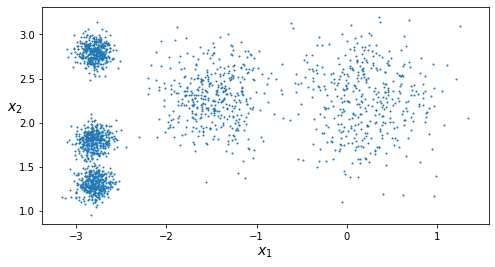

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [6]:
# 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당
from sklearn.cluster import KMeans
k = 5 # 알고리즘이 찾을 클러스터 갯수
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

군집에서의 **레이블**(label) : 알고리즘이 샘플에 할당한 클러스터의 인덱스(분류에서의 클래스 레이블과 다름).

??? `KMeans` 클래스의 인스턴스는 `labels_` 인스턴스 변수에 훈련된 샘플의 레이블을 가지고 있습니다. (p303)

In [7]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [10]:
y_pred is kmeans.labels_

True

In [11]:
# 센트로이드
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [12]:
# 샘플에 가장 가까운 센트로이드의 클러스터를 할당
X_new = np.array([ [0,2], [3,2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [13]:
# 클러스터의 결정 경계를 그려 보로노이 다이어그램(Voronoi tessellation)을 얻을 수 있다.
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

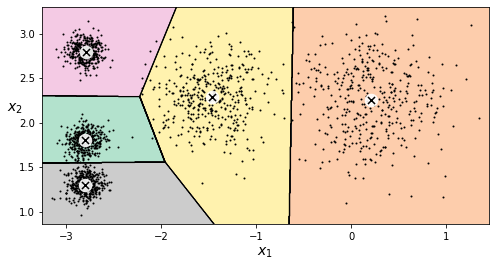

In [14]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

k-평균 알고리즘은 센트로이드까지의 거리를 고려하는 것이 전부이기 때문에 클러스터의 크기가 많이 다르면 잘 작동하지 않는다.
- 하드 군집(hard clustering) : 샘플을 하나의 클러스터에 할당하는 것.
- 소프트 군집(soft clustering) : 클러스터마다 샘플에 점수를 부여하는 것.

In [15]:
# 샘플과 각 센트로이드 사이의 거리
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### k-평균 알고리즘
센트로이드를 랜덤하게 선정한 뒤 샘플에 레이블을 할당하고 샌트로이드를 업데이트 하는 방식을 반복한다.

In [24]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1) # 잘 안 됐으면 random_state를 바꿔서 다시 돌려보자....
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

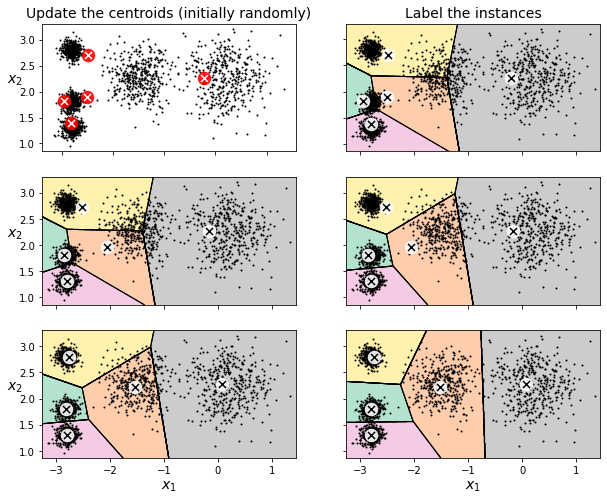

In [25]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

k-평균 알고리즘의 계산 복잡도는 일반적으로 샘플 갯수 $m$, 클러스터 갯수 $k$, 차원 갯수 $n$에 선형적이므로 가장 빠른 군집 알고리즘 중 하나이다.

### 센트로이드 초기화 방법


센트로이드의 위치를 알 수 있다면 `init` 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 `n_init`을 1로 설정할 수 있다.

In [26]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)

다른 방법으로 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택하는 것. <br/>
랜덤 초기화 횟수는 `n_init` 매겨변수로 조절. 기본값은 10(fit() 매서드 호출 전에 알고리즘이 10번 실행된다는 뜻). <br/>
최선의 솔루션을 아는 방법은 이너셔가 가장 낮은 모델을 찾는 것. 
- **이너셔**(inertia) : 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리

In [29]:
# 알고리즘을 n_init번 실행하여 이너셔가 가장 낮은 모델을 반환
kmeans.fit(X)
kmeans.inertia_

211.59853725816828

In [30]:
kmeans.score(X)

-211.5985372581683

사이킷런의 '큰 값이 좋은 것이다'라는 규칙 때문에 음수로 만들어 가장 큰 값을 찾도록 함. (그렇게 하면 가장 작은 이너셔가 골라질 것임.)

k-평균++ 초기화 알고리즘 ???
1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $ \bf{c}^{(1)}$을 선택.
2. $D \left( \bf{\text{x}} ^{(i)} \right) ^2 / \sum_{j=1} ^m D \left( \bf{ \text{x}} ^{(j)} \right) ^2 $의 확률로 샘플 $\bf{\text{x}}^{(i)}$를 새로운 센트로이드 $ \bf{c}^{(i)}$로 선택. 여기서 $D \left( \bf{\text{x}}^{(i)} \right)$는 샘플과 이미 선택된 가장 가까운 센트로이드까지 거리.
3. $k$개의 센트로이드가 선택될 때까지 이전 단계를 반복. 

### k-평균 속도 개선과 미니배치 k-평균


- k-평균 속도 개선 : 삼각부등식을 이용해 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지.
- 미니배치 k-평균 : 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동.

In [31]:
# 미니배치 k-평균
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [34]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

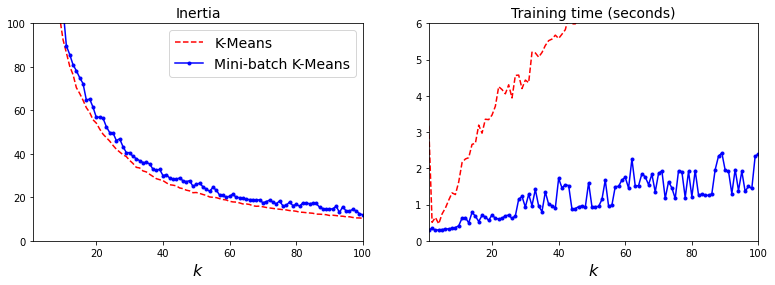

In [38]:
plt.figure(figsize=(13,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

미니배치 k-평균의 이너셔가 k-평균보다 높지만(왼쪽), 훨씬 빠르고 $k$가 증가할수록 더욱 그렇다.

### 최적의 클러스터 갯수 찾기


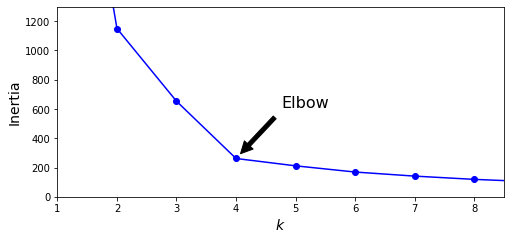

In [40]:
# 이너셔 그래프
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

4까지 이너셔가 급격히 감소하고 그 이후로는 느리게 감소한다. 따라서 4가 좋은 선택이 될 수 있다.

- 실루엣 점수(silhouette score) : 모든 샘플에 대한 **실루엣 계수**(silhouette coefficient)의 평균. 
    - 실루엣 계수 : $ \frac{b-a}{max(a,b)} $ 
    - $a$ : 동일한 클러스터에 있는 다른 샘플까지 평균 거리(클러스터 내부의 평균 거리).
    - $b$ : 가장 가까운 클러스터까지 평균 거리.
- 실루엣 계수는 +1에 가까울수록 클러스터 안에 잘 속해 있고 0에 가까울수록 경계에 위치하고 -1에 가까우면 잘못 할당되었다는 의미.

In [41]:
# 실루엣 점수를 그래프로 그리기
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

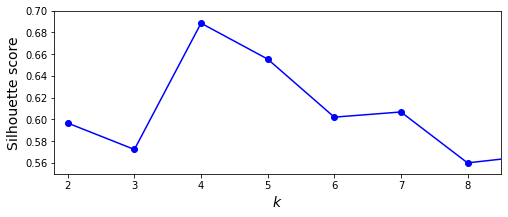

In [42]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

- 실루엣 다이어그램(silhouette diagram) : 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬한 그래프.
    - 그래프의 높이 : 클러스터가 포함하고 있는 샘플의 갯수
    - 그래프의 너비 : 클러스터에 포함된 샘플의 정렬된 실루엣 계수(넓을수록 좋음)

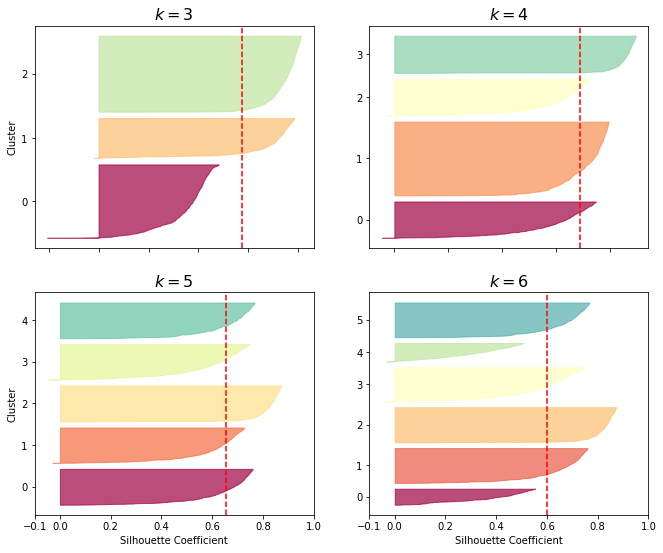

In [43]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

수직 파선은 각 클러스터 갯수에 해당하는 실루엣 점수를 나타냄. <br/>
한 클러스터의 많은 샘플이 파선 왼쪽에서 멈추면 나쁜 클러스터이다. <br/>
$k=5$일 때 모든 클러스터의 크기가 비슷하므로 $k=4$일 때 점수가 높더라도 $k=5$를 선택하는 것이 좋음.

## 9.1.2 k-평균의 한계

k-평균은 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다. <br/>
(참고로 타원형 클러스터는 가우시안 혼합 모델이 잘 작동한다.) <br/>
따라서 입력 특성의 스케일을 맞춰 되도록 원형에 가깝게 형태를 바꿔주는 것이 좋다.

## 9.1.3 군집을 사용한 이미지 분할

- 이미지 분할(image segmentation) : 이미지를 세그먼트(segment) 여러 개로 분할하는 작업.
- 시맨틱 분할(semantic segmentation) : 동일한 종류의 물체에 속한 모든 픽셀을 같은 세그먼트에 할당. ex) 자율주행에서 보행자 세그먼트
- 색상 분할(color segmentation) : 동일한 색상을 가직 픽셀을 같은 세그먼트에 할당.

In [46]:
# 무당벌레 이미지를 다운로드합니다
import os
import urllib.request

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x2002266dc50>)

In [47]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [48]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [49]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

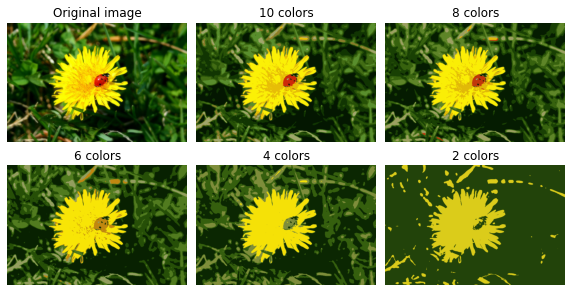

In [50]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## 9.1.4 군집을 사용한 전처리
군집은 차원 축소에 효과적인 방법이다.

In [51]:
# MNIST와 비슷한 데이터셋
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [52]:
# 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [53]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [54]:
# 테스트 세트에서 정확도 평가
log_reg.score(X_test, y_test)

0.9688888888888889

96.9%의 정확도를 얻었다! <br/>
k-평균을 전처리 단계로 사용하면 더 좋아지는지 확인하자. <br/>
파이프라인을 만들어 먼저 훈련 세트를 50개의 클러스터로 모으고 이미지를 50개의 클러스터까지 거리로 바꾼다. 그 뒤 로지스틱 회귀 모델을 적용한다.

In [55]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

참고로 숫자가 0부터 9까지 10개이므로 클러스터 갯수를 10개로 지정할 수도 있겠지만, <br/>
저마다 쓰는 방식이 다르므로 클러스터 갯수를 더 크게 잡는 것이 좋음.

In [56]:
# 분류 파이프라인 평가
pipeline.score(X_test, y_test)

0.9777777777777777

오차율이 줄었다!!

하지만 클러스터의 갯수 $k$를 임의로 정했으므로, `GridSearchCV`를 이용하여 최적의 갯수를 찾아보자.

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=36; total time=   4.8s
[CV] END ..............................kmeans__n_clusters=36; total time=   5.0s
[CV] END ..............................kmeans__n_clusters=36; total time=   5.1s
[CV] END ..............................kmeans__n_clusters=37; total time=   5.1s
[CV] END ..............................kmeans__n_clusters=37; total time=   4.8s
[CV] END ..............................kmeans__n_clusters=37; total time=   4.1s
[CV] END ..............................kmeans__n_clusters=38; total time=   4.8s
[CV] END ..............................kmeans__n_clusters=38; total time=   5.1s
[CV] END ..............................kmeans__n_clusters=38; total time=   4.6s
[CV] END ..............................kmeans__n_clusters=39; total time=   5.3s
[CV] END ..............................kmeans__n_clusters=39; total time=   5.3s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   6.3s
[CV] END ..............................kmeans__n_clusters=70; total time=   6.6s
[CV] END ..............................kmeans__n_clusters=70; total time=   6.3s
[CV] END ..............................kmeans__n_clusters=70; total time=   6.0s
[CV] END ..............................kmeans__n_clusters=71; total time=   5.9s
[CV] END ..............................kmeans__n_clusters=71; total time=   7.3s
[CV] END ..............................kmeans__n_clusters=71; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=72; total time=   5.2s
[CV] END ..............................kmeans__n_clusters=72; total time=   6.2s
[CV] END ..............................kmeans__n_clusters=72; total time=   5.7s
[CV] END ..............................kmeans__n_clusters=73; total time=   5.9s
[CV] END ..............................kmeans__n_clusters=73; total time=   5.9s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [58]:
# 최선의 k값과 이 때의 파이프라인의 성능
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [59]:
grid_clf.score(X_test, y_test)

0.9777777777777777

95개의 클러스터를 사용할 때 정확도가 크게 향상됨.

## 9.1.5 군집을 사용한 준지도 학습
레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용.

In [60]:
# 숫자 데이터셋에서 레이블된 50개 샘플에 로지스틱 회귀 모델 훈련.
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

# 테스트 세트에서 모델의 성능
log_reg.score(X_test, y_test)

0.8333333333333334

훈련 세트를 50개의 클러스터로 모은 뒤 **대표 이미지**(representative image 각 클러스터에서 센트로이드에 가장 가까운 이미지)를 찾는다.

In [61]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

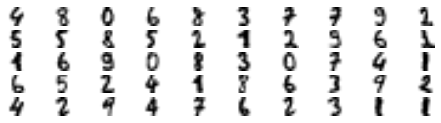

In [62]:
# 대표 이미지 50개
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [63]:
# 수동으로 레이블 할당
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

In [64]:
# 대표 이미지니까 성능이 높게 나오는지 확인
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

성능이 83%에서 92%로 확 올랐다!

샘플에 레이블을 부여하는 것은 비용이 많이 들고 어렵기 때문에 무작위 샘플 대신 대표 샘플에 레이블을 할당하는 것이 좋다.

한 단계 더 나아가, 이 레이블을 동일한 클러스터에 있는 모든 샘플로 전파; **레이블 전파**(label propagation)를 하자!

In [65]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [66]:
# 모델을 다시 훈련하고 성능 확인
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

0.9333333333333333

In [67]:
# 센트로이드와 가까운 샘플의 20%만 레이블을 전파
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [68]:
# 모델을 다시 훈련

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

0.94

전파된 레이블이 매우 좋기 때문에 레이블된 샘플 50개만으로 높은 정확도를 얻을 수 있다. <br/>
99% 실제 데이터와 같음.

In [69]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

#### 능동 학습(active learning)
전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청할 때 특정 샘플의 레이블을 제공. <br/>
가장 널리 사용되는 것 중 하나는 **불확실성 샘플링**(uncertainty sampling)
1. 지금까지 수집한 레이블된 샘플에서 모델을 훈련. 레이블되지 않은 모든 샘플에 대한 예측을 만든다.
2. 모델이 가장 불확실하게 예측한 샘플을 전문가에게 보내 레이블을 붙임.
3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복. 

다른 전략은 모델을 가장 크게 바꾸는 샘플이나 모델의 검증 점수를 가장 크게 떨어뜨리는 샘플에 대해 레이블을 요청하는 것.

## 9.1.6 DBSCAN
밀집된 연속적 지역을 클러스터로 정의.
 - 알고리즘이 각 샘플에서 작은 거리인 $\epsilon$ 내에 샘플이 몇 개 놓여 있는지 센다. 이 지역을 샘플의 **$\epsilon$-이웃**($\epsilon$-neighborhood)이라고 한다.
 - 자기 자신 포함 $\epsilon$-이웃 내에 적어도 `min_samples`개 샘플이 있다면 이를 **핵심 샘플**(core instance)로 간주.
 - 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다. 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성.
 - 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단.
 
모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 낸다. 

In [70]:
# 반달 모양 데이터셋에서 사이킷런의 DBSCAN 클래스를 사용해보기
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [72]:
# 샘플의 레이블은 인스턴스 변수 labels_에 저장됨.
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

인덱스 -1은 이상치 판단을 의미. <br/>
핵심 샘플의 인덱스는 인스턴스 변수 `core_sample_indices_`에서 확인 가능. <br/>
핵심 샘플 자체는 인스턴스 변수 `components_`에 저장되어 있음.

In [73]:
len(dbscan.core_sample_indices_)

808

In [74]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [75]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [76]:
# 이웃 반경을 0.2로 넓인 모델
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [77]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

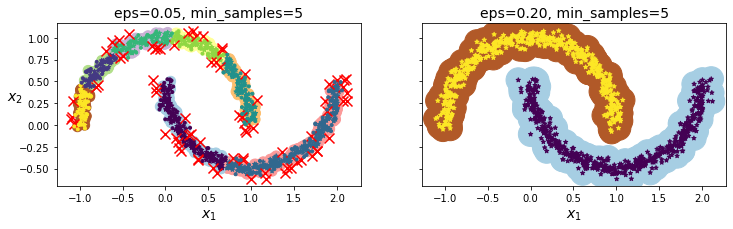

In [81]:
plt.figure(figsize=(12, 3))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

왼쪽은 이상치를 너무 많이 감지하였고 클러스터도 많다. 이웃 범위를 넓힌 오른쪽이 훨씬 괜찮은 군집을 얻었다.

DBSCAN은 새로운 샘플에 대해 클러스터를 예측할 수 없다. 따라서 사용자가 필요한 예측기를 선택해야 함.

In [82]:
# KNeighborsClassifier를 훈련해보자.
dbscan = dbscan2

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [84]:
# 샘플을 몇 개 전달하여 어떤 클러스터에 속할 가능성이 높은지 예측
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [85]:
# 각 클러스터에 대한 확률 추정
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

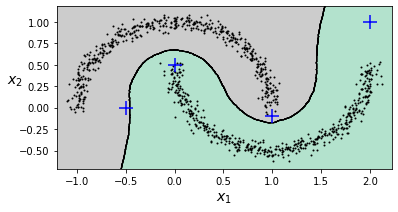

In [86]:
# 결정 경계
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

훈련 세트에 이상치가 없어서 무조건 분류가 되는데, 최대 거리를 이요하면 멀리 떨어진 샘플을 이상치로 분류할 수 있다. <br/>
`NeighborsClassifier`의 `kneighbors()` 메서드를 사용하면 훈련 세트에서 가장 가까운 $k$개 이웃의 거리와 인덱스를 반환한다.

In [87]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

DBSCAN은 모양과 갯수에 상관없이 감지할 수 있고 이상치에 안정적이며 하이퍼파라미터가 두 개뿐임. <br/>
하지만 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내느 것이 불가능하다.

## 9.1.7 다른 군집 알고리즘
### 병합 군집(agglomerative clustering)
클러스터 계층을 밑바닥부터 위로 쌓아 구성한다. 처음에는 샘플 하나에서 시작해 반복때마다 인접한 클러스터 쌍을 연결한다. 병합한 클러스터 쌍을 트리로 모두 그리면 클러스터의 이진 트리를 얻을 수 있다. 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있다. 특정 클러스터 갯수를 선택하는 데 도움이 되는 트리를 만들 수 있고 대규모 샘플에도 잘 적용할 수 있음.

### BIRCH(balanced iterative reducing and clustering using hierarchies)
대규모 데이터셋을 위해 고안되었으며 특성 갯수가 너무 많지 않다면(20개 이하) 배치 k-평균보다 빠르고 비슷한 결과를 만든다. 훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조를 만드나 트리에 모든 샘플을 저장하지는 않기 때문에 제한된 메모리에서 대용량 데이터셋을 다루는 데에 적합하다.

### 평균-이동(mean-shift)
각 샘플을 중심으로 하는 원을 그리고 원마다 안에 포함된 모든 샘플의 평균을 구한다. 그리고 원의 중심을 평균점으로 이동시키고 모든 원이 움직이지 않을 때까지 계속한다. 모양이나 갯수에 상관없이 클러스터를 찾을 수 있고 하이퍼파라미터도 **밴드위스**(bandwidth)라 부르는 원 반경 딱 한 개로 매우 적다. 하지만 클러스터 내부 밀집도가 불균형할 때 여러 개로 나누는 경향이 있고 계산 복잡도가 $O(m^2 )$로 대규모 데이터셋에는 적합하지 않다.

### 유사도 전파(affinity propagation)
샘플이 자신을 대표할 수 있는 비슷한 샘플에 투표하는 투표 방식을 이용. 알고리즘이 수렴하면 각 대표와 투표한 샘플이 클러스터를 형성한다. 크기가 다른 여러 개의 클러스터를 감지할 수 있지만 계산 복잡도가 $O(m^2 )$로 대규모 데이터셋에는 적합하지 않다.

### 스펙트럼 군집(spectral clustering)
샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만들어 이 공간에서 또 다른 군집 알고리즘을 사용한다. 복잡한 클러스터 구조를 감지하고 그래프 컷(graph cut)을 찾는 데 사용할 수 있지만 샘플 갯수가 많으면 잘 적용되지 않고 클러스터의 크기가 매우 다르면 잘 작동하지 않는다.

# 9.2 가우시안 혼합
- 가우시안 혼합(Gaussian mixture model, GMM) <br/>
: 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델. <br/>
하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성하며, 일반적으로 타원형이다.

GMM의 변종의 가장 간단한 버전이 `GaussianMixture` 클래스에 구현되어 있음. 가우시안 분포의 갯수 $k$를 알아야 함. <br/>
데이터셋 $X$가 다음 확률 과정을 통해 생성되었다고 가정한다.
 - 샘플마다 $k$개의 클러스터에서 랜덤하게 한 클러스터가 선택된다.
     - 클러스터 가중치 $\phi ^{(j)} $ : $j$번째 클러스터를 선택할 확률
     - 클러스터 인덱스 $z^{(i)}$ : $i$번째 샘플을 위해 선택한 클러스터 인덱스
 - $z^{(i)} = j$이면 이 샘플의 위치 $ x^{(i)}$는 평균이 $\mu ^{(j)}$이고 공분산 행렬이 $\Sigma ^{(j)}$인 가우시안 분포에서 랜덤하게 샘플링된다; $ x^{(i)} \sim \mathscr{N} \left( \mu ^{(j)} , \Sigma ^{(j)} \right) $

??? 가우시안 혼합 모델 그래프 모형 잘 이해 안 됨 ㅠㅠ